In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling Sub-halo Alignment 2-point Correlations

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0.0, dz_tol=0.001, version_name='halotools_v0p4')
for name in halocat.halo_table.dtype.names:
    print(name)

halo_vmax_firstacc
halo_dmvir_dt_tdyn
halo_macc
halo_scale_factor
halo_vmax_mpeak
halo_m_pe_behroozi
halo_xoff
halo_spin
halo_scale_factor_firstacc
halo_c_to_a
halo_mvir_firstacc
halo_scale_factor_last_mm
halo_scale_factor_mpeak
halo_pid
halo_m500c
halo_id
halo_halfmass_scale_factor
halo_upid
halo_t_by_u
halo_rvir
halo_vpeak
halo_dmvir_dt_100myr
halo_mpeak
halo_m_pe_diemer
halo_jx
halo_jy
halo_jz
halo_m2500c
halo_mvir
halo_voff
halo_axisA_z
halo_axisA_x
halo_axisA_y
halo_y
halo_b_to_a
halo_x
halo_z
halo_m200b
halo_vacc
halo_scale_factor_lastacc
halo_vmax
halo_m200c
halo_vx
halo_vy
halo_vz
halo_dmvir_dt_inst
halo_rs
halo_nfw_conc
halo_hostid
halo_mvir_host_halo


## Alignment Models

In [3]:
from intrinsic_alignments.ia_models.ia_model_components import CentralAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import MajorAxisSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import HybridSatelliteAlignment

In [4]:
# create a model table
from intrinsic_alignments.ia_models.utils import halocat_to_galaxy_table
table = halocat_to_galaxy_table(halocat)

In [5]:
# apply central alignments to model
cen_alignment_model = CentralAlignment(central_alignment_stregth=0.95)
table = cen_alignment_model.assign_orientation(table=table)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Projects/intrinsic_alignments/ia_models/utils.py:299: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Projects/intrinsic_alignments/ia_models/utils.py:299: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Projects/intrinsic_alignments/ia_models/utils.py:301: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Projects/intrinsic_alignments/ia_models/utils.py:301: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


In [6]:
# apply satellite alignments to model
sat_alignment_model = RadialSatelliteAlignment()
table = sat_alignment_model.assign_orientation(table=table, Lbox=halocat.Lbox)

## Alignment Correlation Functions

In [7]:
from halotools.mock_observables.alignments import ed_3d, ee_3d
from halotools.mock_observables.alignments import ee_3d_one_two_halo_decomp, ed_3d_one_two_halo_decomp

rbins = np.logspace(-1,1.4,20)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

In [8]:
# galaxy coordinates and orientations
galaxy_coords = np.vstack((table['x'],
                           table['y'],
                           table['z'])).T

galaxy_orientations = np.vstack((table['galaxy_axisA_x'],
                                 table['galaxy_axisA_y'],
                                 table['galaxy_axisA_z'])).T

cens = table['gal_type']=='centrals'
sats = table['gal_type']=='satellites'
gal_mask = table['halo_mpeak']>10**12

# halo orientations
halo_coords = np.vstack((halocat.halo_table['halo_x'],
                         halocat.halo_table['halo_y'],
                         halocat.halo_table['halo_z'])).T

halo_orientations = np.vstack((halocat.halo_table['halo_axisA_x'],
                               halocat.halo_table['halo_axisA_y'],
                               halocat.halo_table['halo_axisA_z'])).T

hosts = halocat.halo_table['halo_upid']==-1
subs = halocat.halo_table['halo_upid']!=-1
halo_mask = halocat.halo_table['halo_mpeak']>10**12

In [9]:
galaxy_eta = ed_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                   galaxy_coords[gal_mask],
                   rbins, period=halocat.Lbox, num_threads=4)
galaxy_omega = ee_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     rbins, period=halocat.Lbox, num_threads=4)

In [10]:
halo_eta = ed_3d(halo_coords[halo_mask], halo_orientations[halo_mask], halo_coords[halo_mask],
                 rbins, period=halocat.Lbox, num_threads=4)
halo_omega = ee_3d(halo_coords[halo_mask], halo_orientations[halo_mask],
                   halo_coords[halo_mask], halo_orientations[halo_mask],
                   rbins, period=halocat.Lbox, num_threads=4)

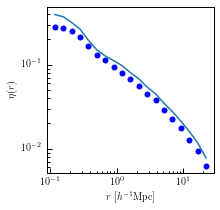

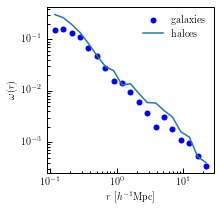

In [11]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_eta, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.show()

fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_omega, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.legend([p1,p2],['galaxies','haloes'], frameon=False, loc='upper right', fontsize=10)
plt.show()

## 1- and 2-halo decomposition

In [13]:
table

halo_id,halo_upid,x,y,z,vx,vy,vz,halo_mpeak,galaxy_axisA_x,galaxy_axisA_y,galaxy_axisA_z,galaxy_axisB_x,galaxy_axisB_y,galaxy_axisB_z,galaxy_axisC_x,galaxy_axisC_y,galaxy_axisC_z,gal_type,halo_x,halo_y,halo_z,halo_mvir,halo_axisA_x,halo_axisA_y,halo_axisA_z
int64,int64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,unicode10,float64,float64,float64,float64,float64,float64,float64
3060299107,-1,35.725,43.2765,17.713,48.16,-34.49,-82.51,1.643e+14,-0.857177978954,0.39663702747,-0.328519376653,0.494366780576,0.454843356928,-0.740755699891,0.144386282794,0.797368540324,0.58596587976,centrals,35.7249908447,43.2765007019,17.7129898071,1.64299997708e+14,51.3941001892,-20.2019004822,17.9174003601
3060312953,-1,45.2089,49.7075,39.9112,-14.21,264.96,-132.11,1.589e+14,0.611624355392,-0.10402571924,0.784279476735,-0.773333680353,0.130574337785,0.620407415449,0.166945100927,0.985966019723,0.000584147132997,centrals,45.2089195251,49.7075119019,39.911239624,1.5889999908e+14,47.9604988098,-3.02157998085,41.3292007446
3058440575,-1,21.812,13.8923,9.54759,-4.75,104.38,-61.29,1.144e+14,-0.79077352458,-0.492189665881,-0.363904610611,-0.606906290894,0.707794430673,0.361513205819,-0.0796365927037,-0.506731069412,0.858418101157,centrals,21.8120098114,13.8922595978,9.54759025574,1.1440000231e+14,40.1133003235,18.3442993164,11.6084003448
3058441456,-1,26.1803,14.3142,6.51834,-271.94,78.85,423.44,9.709e+13,-0.484861696747,-0.016971383265,0.874426158791,-0.809351418701,0.38761327332,-0.441255290498,0.331450473032,0.921665841016,0.201674642506,centrals,26.1803398132,14.3142299652,6.51834011078,9.70900006502e+13,49.165599823,-6.97702980042,-40.8121986389
3058452345,-1,1.74397,29.7332,17.8252,317.08,238.52,179.34,8.527e+13,0.775191025088,-0.608205868233,-0.170776158962,-0.437623605535,-0.711972622318,0.549163513854,0.455592421471,0.350970948821,0.818080031893,centrals,1.74397003651,29.7332401276,17.8251895905,8.52699989934e+13,37.964099884,-19.6548995972,-1.47247004509
3058463669,-1,10.2739,26.2383,22.2927,-57.3,186.67,-187.27,8.439e+13,0.596974649008,0.562858247968,0.57167461124,0.800183928895,-0.468980010665,-0.373849474433,-0.0576797050931,-0.680623495253,0.730359301529,centrals,10.2738800049,26.2383308411,22.2926807404,8.42600022016e+13,44.0497016907,15.064499855,29.0485992432
3058683023,-1,12.0235,36.6319,33.6698,-306.38,-77.55,-386.58,8.357e+13,0.515127249947,0.854287865319,0.0695425016096,0.126013360172,-0.155738630061,0.979727570381,-0.847799828627,0.495921084725,0.187876896677,centrals,12.0234804153,36.6319313049,33.6697998047,8.35699972506e+13,16.772600174,38.7454986572,4.325319767
3060115960,-1,45.8238,6.50973,41.8451,-233.79,179.51,64.62,7.795e+13,-0.976052083677,0.171861182828,-0.133364402245,0.147429597916,0.0718017477761,-0.98646288459,0.159958880989,0.982501014174,0.0954196706103,centrals,45.8237609863,6.50972986221,41.8451004028,7.79499989893e+13,25.442199707,-2.93612003326,35.2636985779
3058477222,-1,14.5065,24.5942,38.4724,-31.82,239.24,-397.53,7.284e+13,-0.0410414624562,-0.0444645310817,0.998167573023,-0.514469966028,0.85733912038,0.0170378026994,0.856525686955,0.512827981044,0.0580621171164,centrals,14.5065002441,24.5941905975,38.4723815918,7.28400029286e+13,-10.2829999924,-11.0193004608,42.6865997314
